In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image


import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
dataDirectory = os.listdir('C:/Users/imham/Desktop/chest_xray')
print(dataDirectory)

['.DS_Store', 'test', 'train', 'val']


In [3]:
trainFolder= 'C:/Users/imham/Desktop/chest_xray/train/'    #all the training images
validationFolder = 'C:/Users/imham/Desktop/chest_xray/val/'      #all the validation images
testFolder = 'C:/Users/imham/Desktop/chest_xray/test/'    #all the testing images


os.listdir(trainFolder)
trainNormal = trainFolder+'NORMAL/'
trainPneumonia = trainFolder+'PNEUMONIA/'

NORMAL


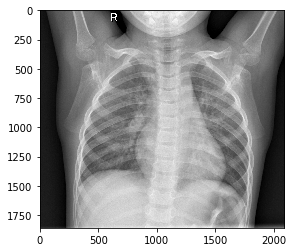

PNEUMONIA


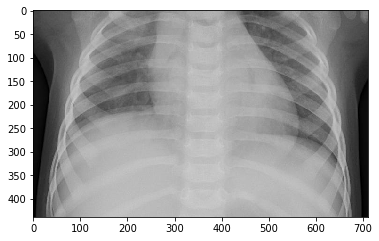

In [4]:
#showing both normal and pneumonia picture
img_normal = load_img('C:/Users/imham/Desktop/chest_xray/train/NORMAL/IM-0115-0001.jpeg')

print('NORMAL')
plt.imshow(img_normal)
plt.show()


img_pneumonia = load_img('C:/Users/imham/Desktop/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg')

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [5]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Conv2D(32, (3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())

cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(trainFolder,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(validationFolder,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(testFolder,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [8]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/10
163/163 [==============================] - 140s 856ms/step - loss: 0.3780 - acc: 0.8253 - val_loss: 0.3405 - val_acc: 0.9375
Epoch 2/10
163/163 [==============================] - 139s 854ms/step - loss: 0.2370 - acc: 0.9053 - val_loss: 0.8078 - val_acc: 0.6250
Epoch 3/10
163/163 [==============================] - 134s 824ms/step - loss: 0.2092 - acc: 0.9135 - val_loss: 0.6542 - val_acc: 0.6250
Epoch 4/10
163/163 [==============================] - 139s 852ms/step - loss: 0.1864 - acc: 0.9256 - val_loss: 0.5189 - val_acc: 0.7500
Epoch 5/10
163/163 [==============================] - 133s 816ms/step - loss: 0.1794 - acc: 0.9302 - val_loss: 0.3127 - val_acc: 0.8125
Epoch 6/10
163/163 [==============================] - 180s 1s/step - loss: 0.1884 - acc: 0.9281 - val_loss: 0.6283 - val_acc: 0.6250
Epoch 7/10
163/163 [==============================] - 196s 1s/step - loss: 0.1655 - acc: 0.9344 - val_loss: 0.2738 - val_acc: 0.8125
Epoch 8/10
163/163 [==============================] - 

In [ ]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

In [10]:
print('Accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 87.81840591618734 %
